<a href="https://colab.research.google.com/github/sonika-07/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **1. Importing libraries**

In [2]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import datetime

# Importing Models libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2. Loading the Play store dataset**

In [4]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = "ISO-8859-1")

## **3. Dataset OverView**

In [ ]:
# Dataset First Look
df.head()          #Top 5 rows 

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017                254     0             -5.2           37   
1  01-12-2017                204     1             -5.5           38   
2  01-12-2017                173     2             -6.0           39   
3  01-12-2017                107     3             -6.2           40   
4  01-12-2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
df.tail()   #bottom 5 rows

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30-11-2018               1003    19              4.2           34   
8756  30-11-2018                764    20              3.4           37   
8757  30-11-2018                694    21              2.6           39   
8758  30-11-2018                712    22              2.1           41   
8759  30-11-2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(len(df[df.duplicated()]))

0


In [ ]:
#count of each date
df.Date.value_counts()

01-12-2017    24
09-08-2018    24
07-08-2018    24
06-08-2018    24
05-08-2018    24
              ..
31-03-2018    24
30-03-2018    24
29-03-2018    24
28-03-2018    24
30-11-2018    24
Name: Date, Length: 365, dtype: int64

Here we have Dataset of one year with 24 hours.
let's see if we have more than 24 hrs of any day.

In [ ]:
#see the unique values of hour
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

So here we have data of 24 hrs of each day of the year.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

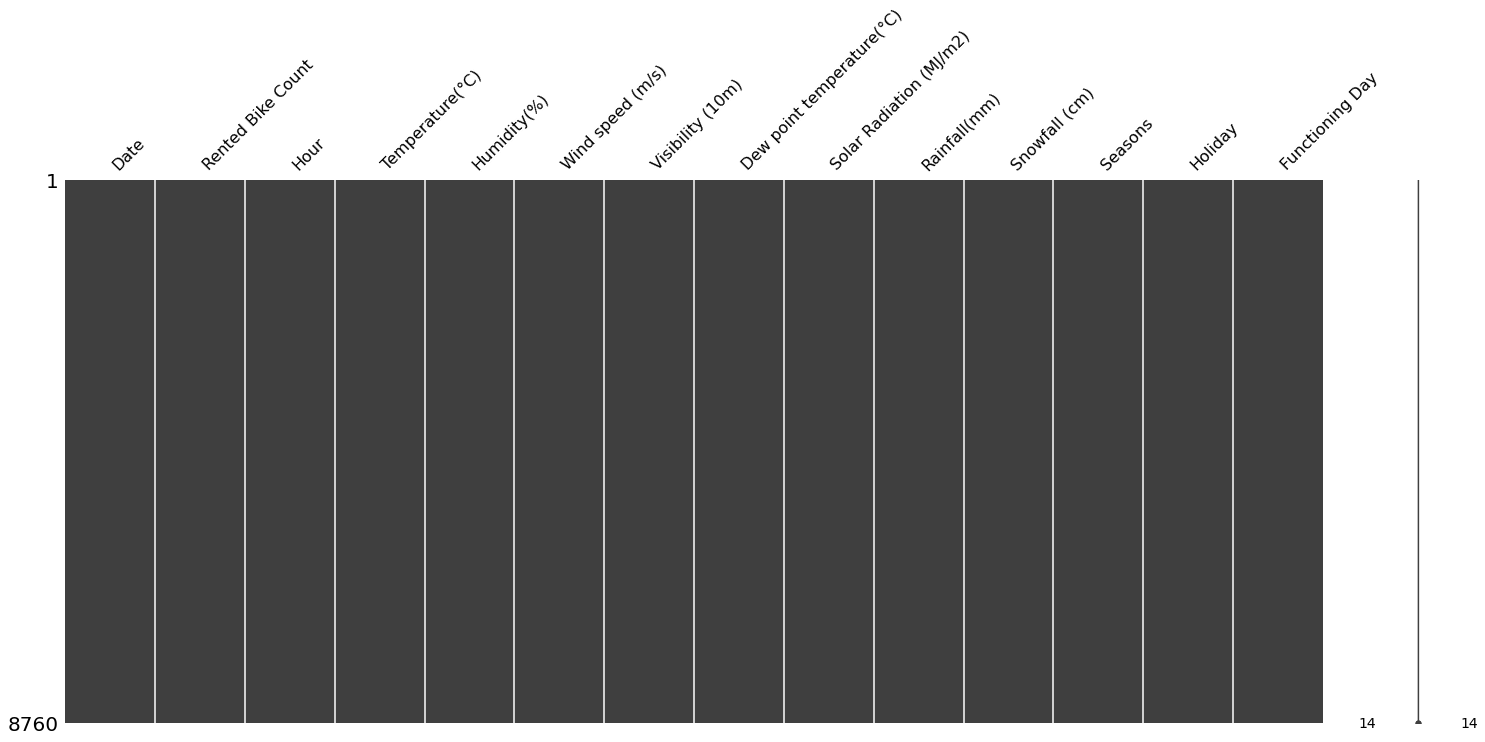

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)

We can see that there are no missing values in our dataset

## **4. Understanding Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01-12-2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

All the statistical information is available for each variable.

We have 3 categorical columns. Let's find out unique values for each categorical column.

### Check Unique Values for each categorical variable.

In [ ]:
# Checking Unique Values for seasons
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

There are four seasons in a year and for each season the dataset is available.

In [ ]:
## Checking Unique Values for holiday
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

There are two unique values for holiday column : Holiday or No Holiday
8328 data is no holiday, i.e., 347days while 432 data is holiday, i.e., 18 days.

In [ ]:
# Checking Unique Values for functionig day
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Two unique values for Functioning day.

## 5. **Data Wrangling**

### 5.1 Changing the 'Date' data type to datetime

In [5]:
df['Date']= pd.to_datetime(df['Date'])

###5.2 Creating column for number of month and find if it's weekend or not 

In [6]:
#extracting month and weekend
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

Other columns do not require changes. So let's proceed 

##**6. Exploratory Data Analysis**

In [7]:
#list of numerical column
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

###6.1 Univariate Analysis

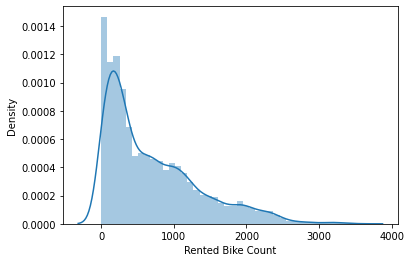

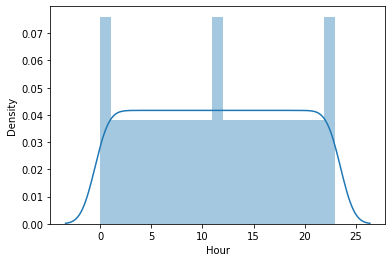

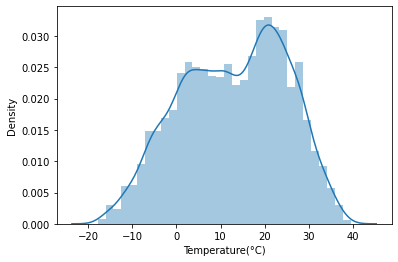

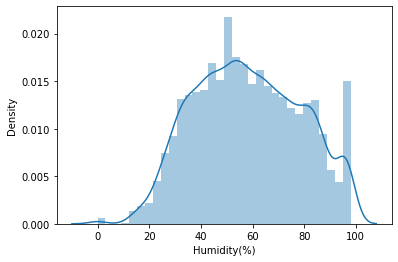

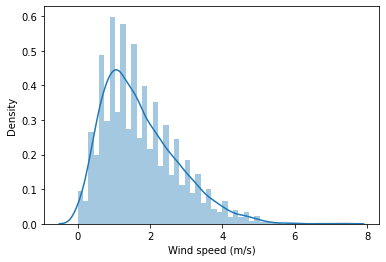

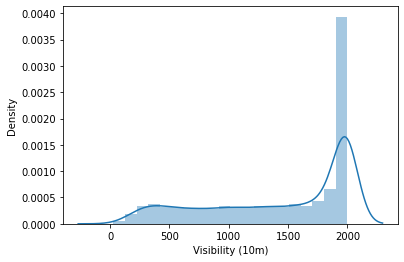

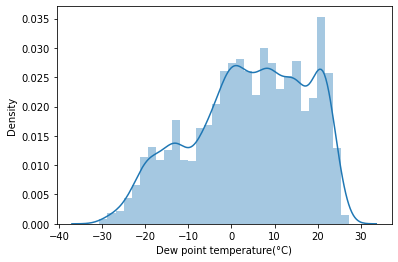

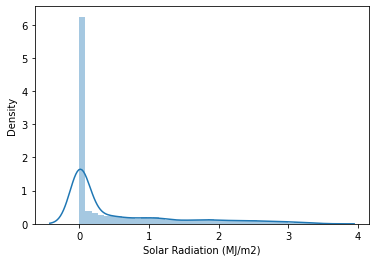

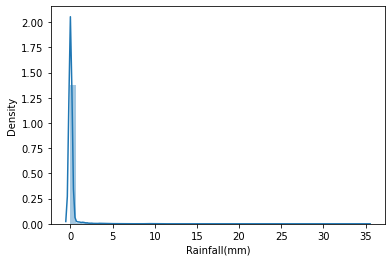

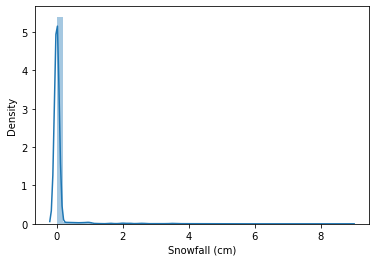

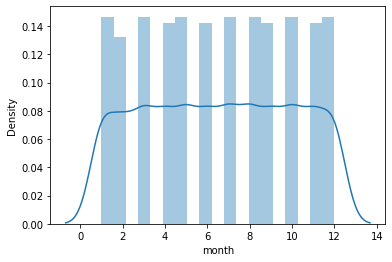

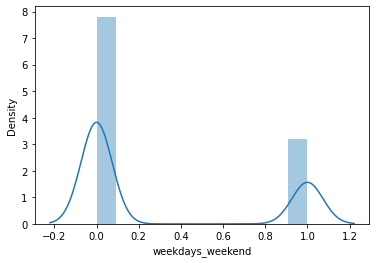

In [7]:
#Distribution plot
for col in num_col:
  sns.distplot(df[col])
  plt.show()

Here it is clearly visible that None of the columns is normally distributed.

Let's check if mean and median are on same axis or not.

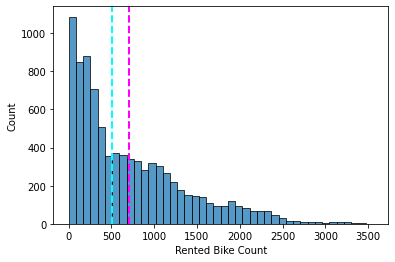

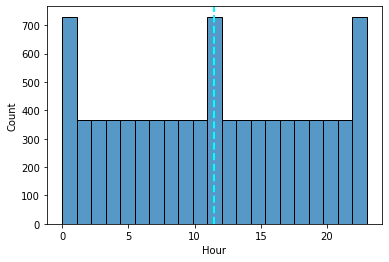

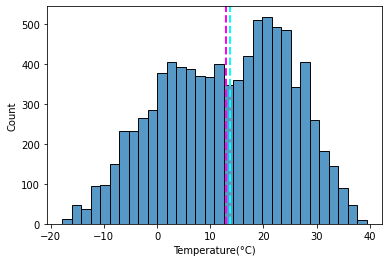

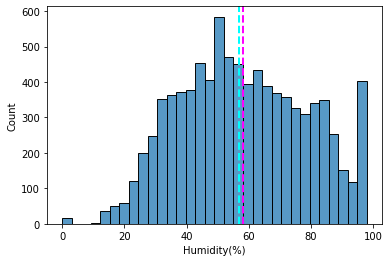

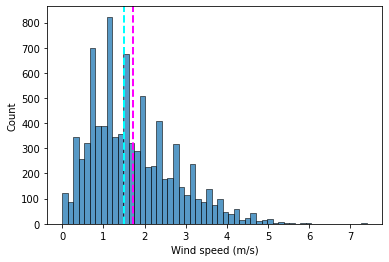

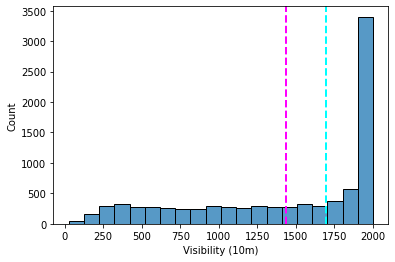

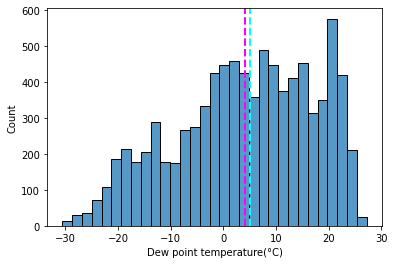

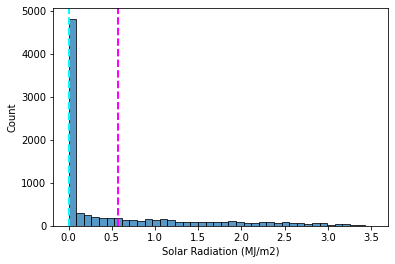

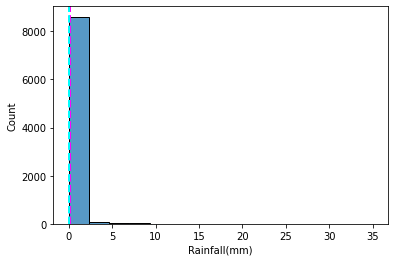

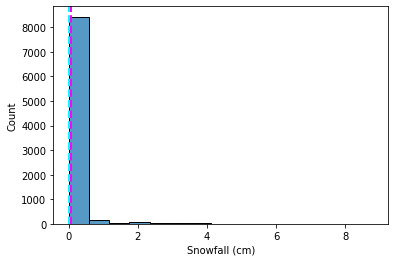

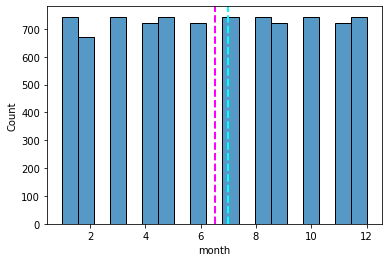

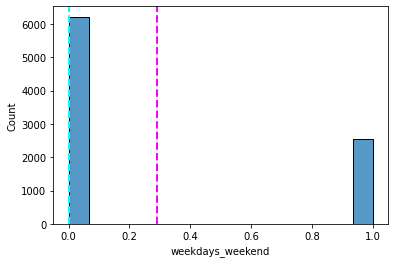

In [8]:
#Histogram
for col in num_col[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

Rented bike count which is dependent variable is positively skewed.

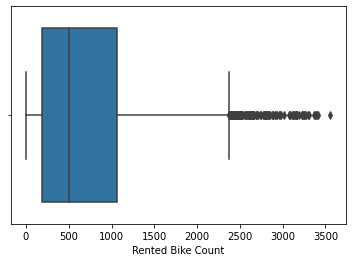

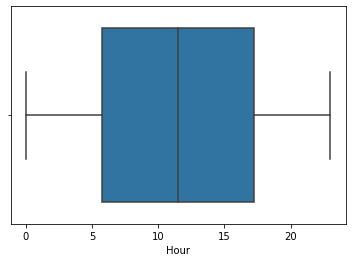

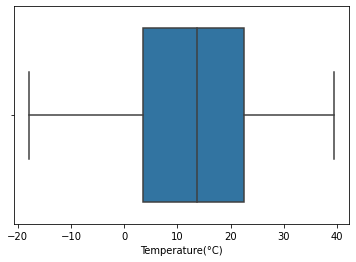

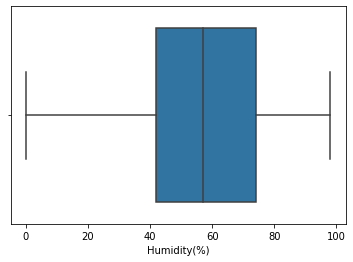

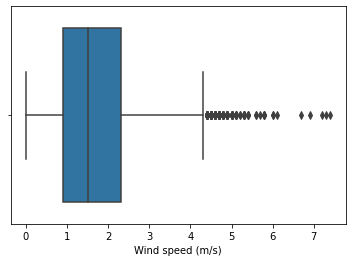

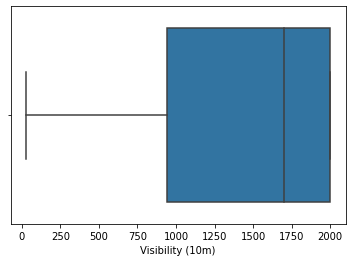

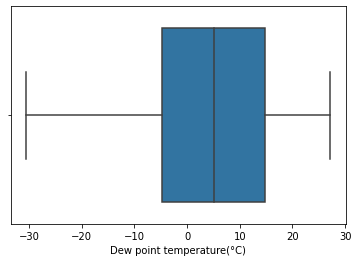

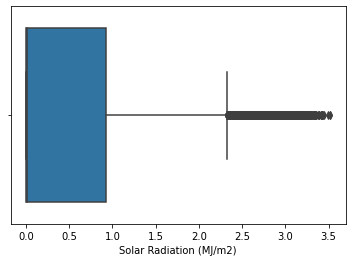

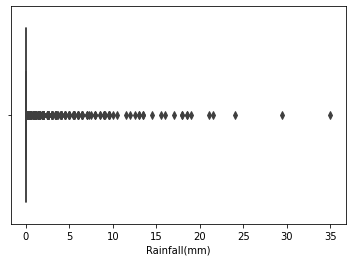

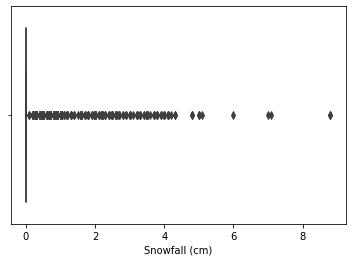

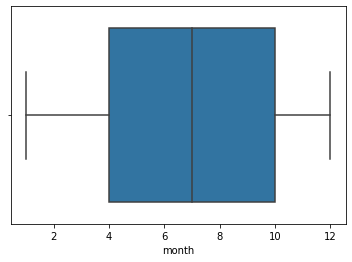

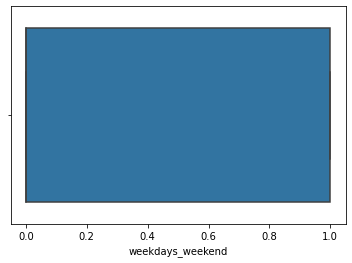

In [9]:
#Boxplot
#Checking for outliers
for col in num_col[:]:
  sns.boxplot(x=col,data=df)
  plt.show()

Outliers present in some columns. These are:

[ 'Rented Bike Count' , 'Wind speed (m/s)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

###4.2 Bivariate analysis

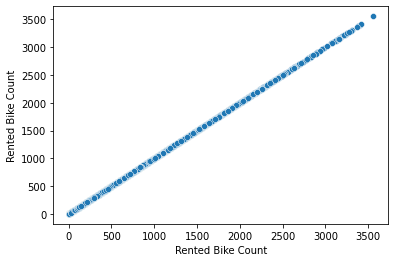

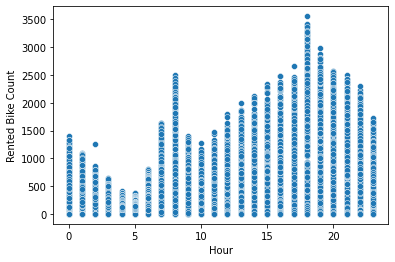

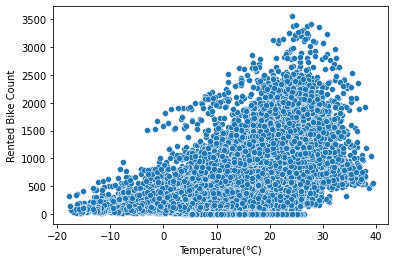

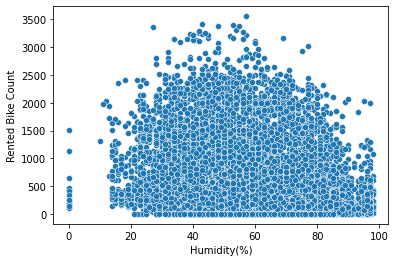

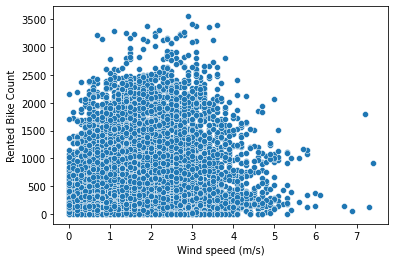

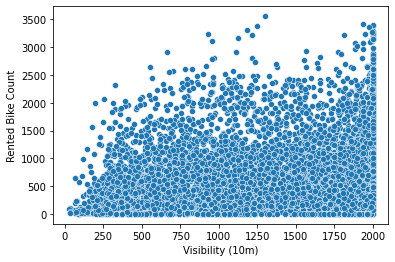

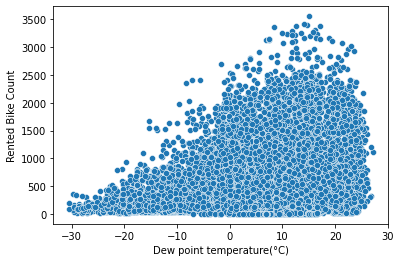

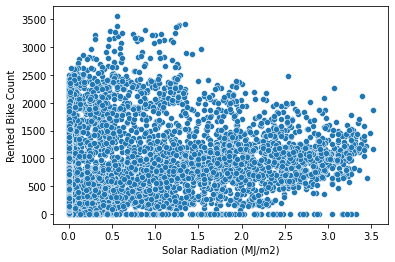

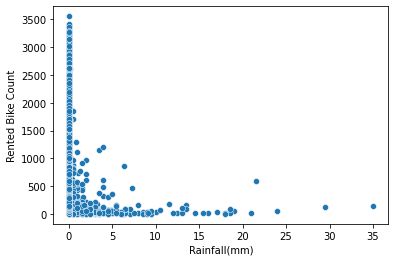

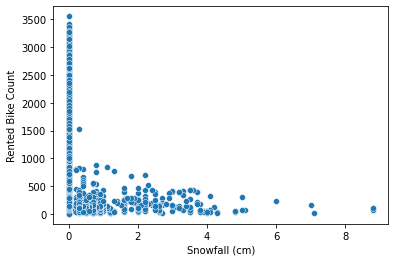

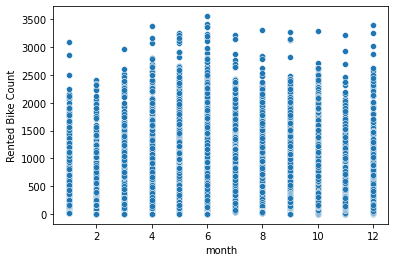

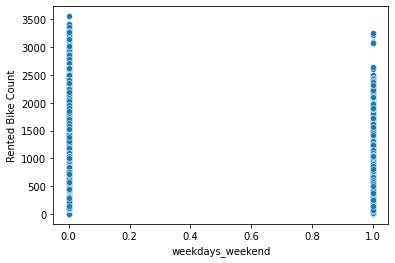

In [10]:
#scatter plot
for col in num_col:
  sns.scatterplot(x=col,y='Rented Bike Count',data=df)
  plt.show()

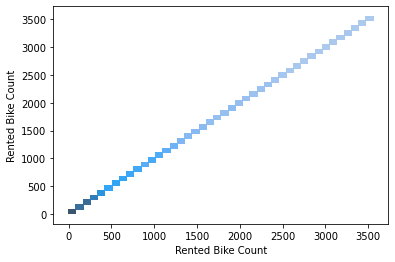

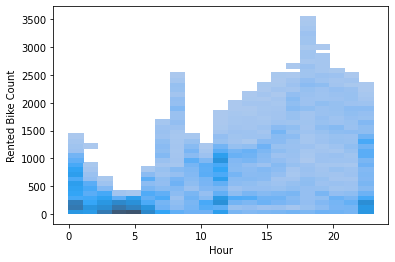

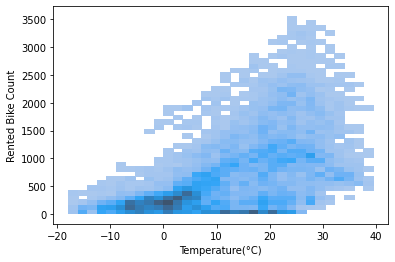

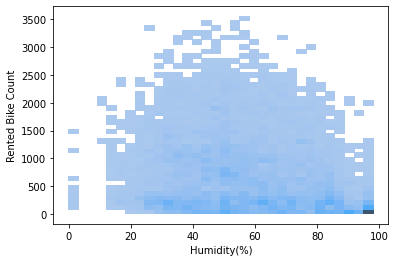

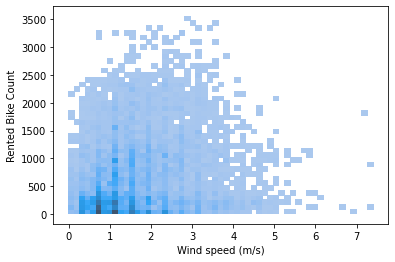

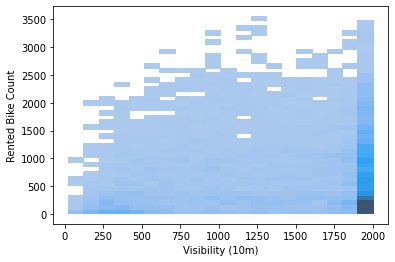

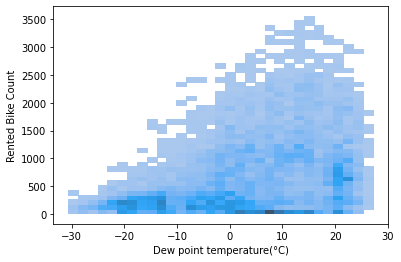

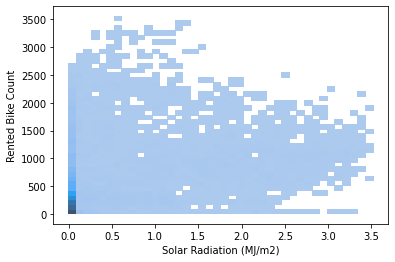

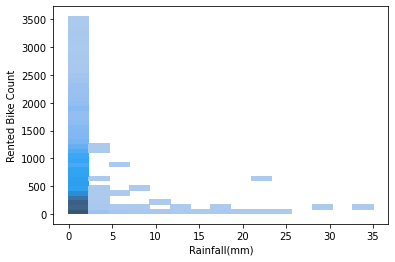

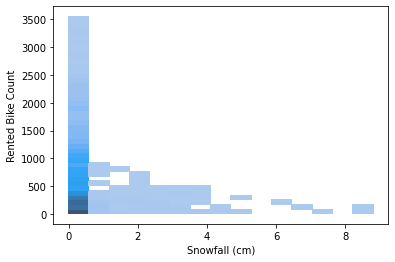

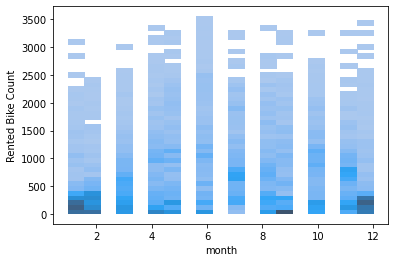

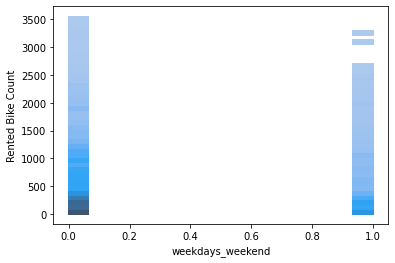

In [17]:
#scatter plot
for col in num_col:
  sns.histplot(x=col,y='Rented Bike Count',data=df)
  plt.show()

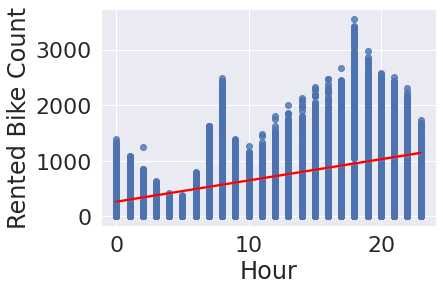

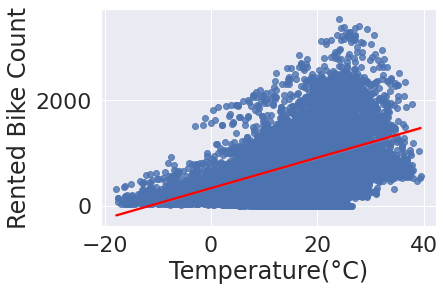

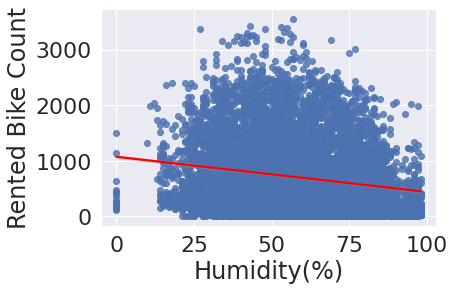

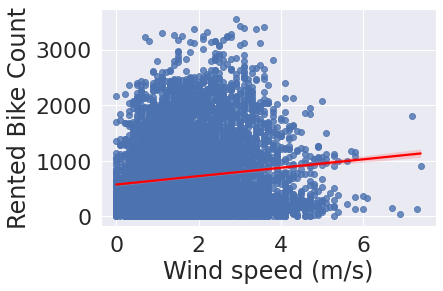

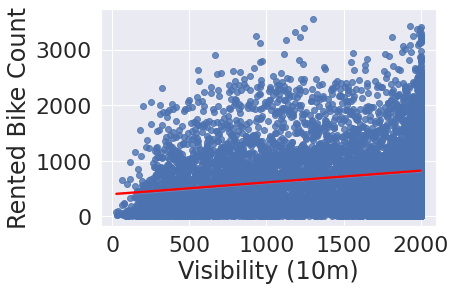

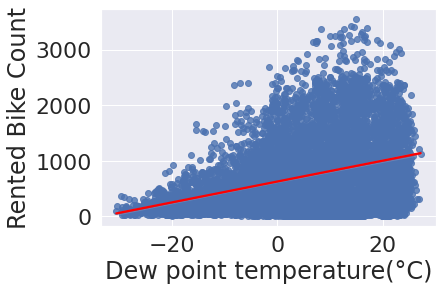

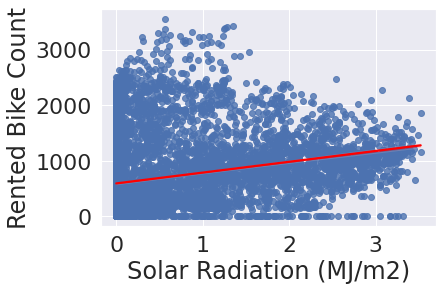

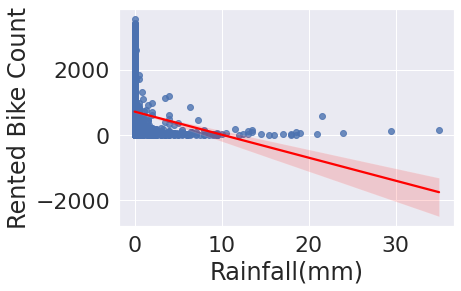

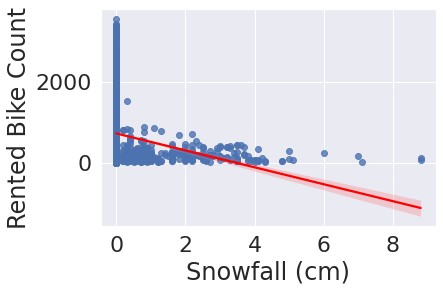

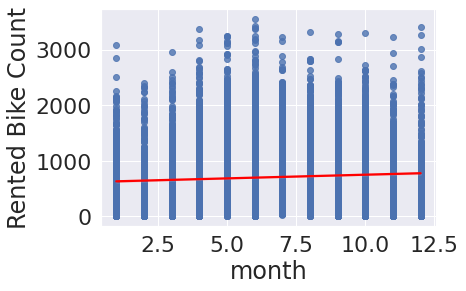

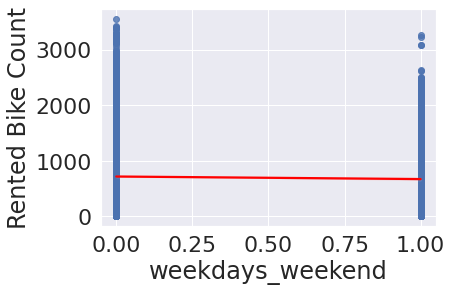

In [12]:
#Plotting the regression line
for col in num_col[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [21]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

WHich month have the most demand for rented bike count?


In [34]:
month_count=pd.DataFrame(df.groupby(by='month',as_index=False)['Rented Bike Count'].sum())
month_count

month  Rented Bike Count
0       1             287244
1       2             264112
2       3             455037
3       4             556219
4       5             665948
5       6             706728
6       7             691339
7       8             614190
8       9             499326
9      10             626988
10     11             493412
11     12             311771

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

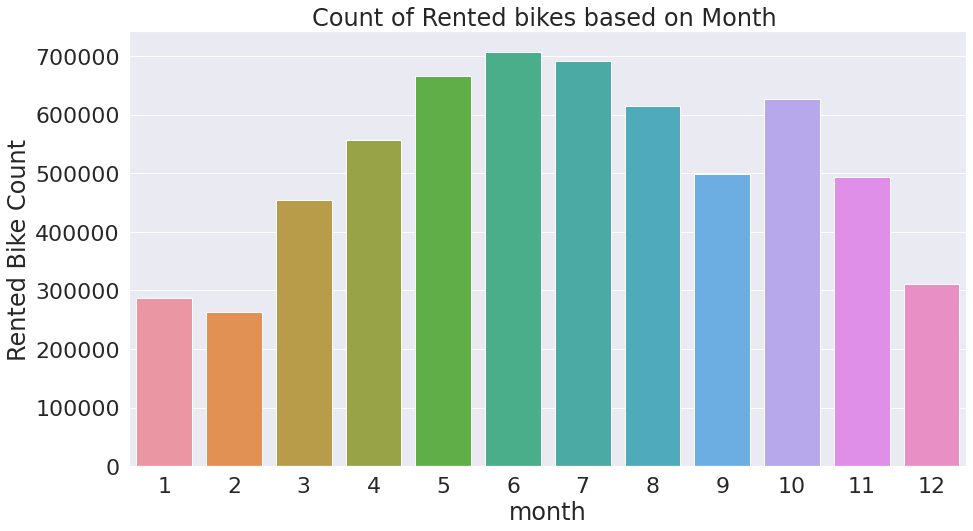

In [35]:
#visual analysis of month and rented bike count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=month_count,x='month',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes based on Month ')

The demand for rented bike count is highest in the month of May, June, July and lowest in the month of December, January, February.

Demand of rented bikes for different seasons

In [8]:
season_count=pd.DataFrame(df.groupby(by='Seasons',as_index=False)['Rented Bike Count'].sum()) 
season_count

Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons ')]

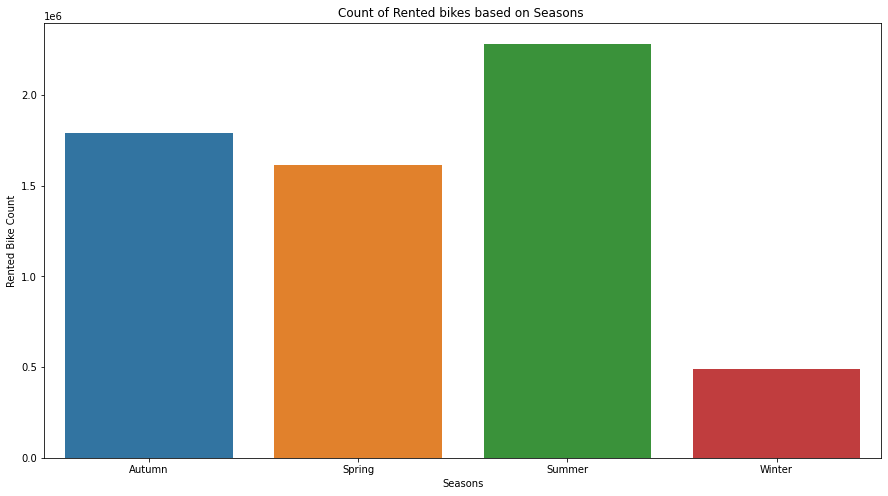

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=season_count,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes based on Seasons ')

Average count of rented bike in each hour

In [21]:
avg_hr=pd.DataFrame(df.groupby(by='Hour',as_index=False)['Rented Bike Count'].mean())
avg_hr

Hour  Rented Bike Count
0      0         541.460274
1      1         426.183562
2      2         301.630137
3      3         203.331507
4      4         132.591781
5      5         139.082192
6      6         287.564384
7      7         606.005479
8      8        1015.701370
9      9         645.983562
10    10         527.821918
11    11         600.852055
12    12         699.441096
13    13         733.246575
14    14         758.824658
15    15         829.186301
16    16         930.621918
17    17        1138.509589
18    18        1502.926027
19    19        1195.147945
20    20        1068.964384
21    21        1031.449315
22    22         922.797260
23    23         671.126027

<Figure size 1080x720 with 0 Axes>

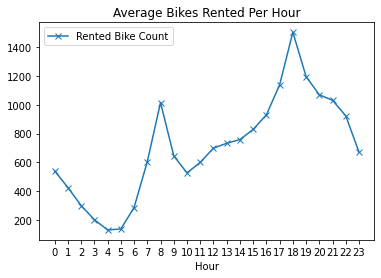

In [35]:
plt.figure(figsize=(15,10))
a=avg_hr.plot(x='Hour',y='Rented Bike Count',legend=True,title="Average Bikes Rented Per Hour",marker='x')
a.set_xticks(range(len(avg_hr)))
#a.set_xticklabels(avg_hr.index.tolist(), rotation=85)

onclusion

High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

Effect of weekends on demand of bike

In [12]:
#apps with content rating
weekend_count=pd.DataFrame(df.groupby('weekdays_weekend')['Rented Bike Count'].sum())
weekend_count=weekend_count.reset_index()
weekend_count.columns=['Weekend','count']
weekend_count

Weekend    count
0        0  4462544
1        1  1709770

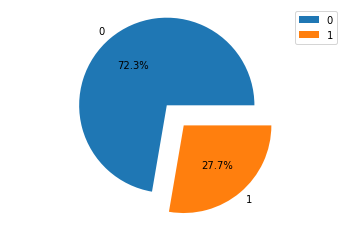

In [15]:
#visualizing through pie chart
labels=weekend_count['Weekend']
sizes=weekend_count['count']
myexplode = [ 0,0.3]
plt.pie(sizes,labels=labels,explode=myexplode,autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.show()

Rented bikes are approximately 30% used by riders on weekends.
now find out rented bikes count if weekend was holiday or not. 

In [26]:
weekend_holiday_count=pd.DataFrame(df.groupby(['weekdays_weekend','Holiday'],as_index=False)['Rented Bike Count'].sum())
df_count=weekend_holiday_count.pivot('weekdays_weekend','Holiday',	'Rented Bike Count').fillna(0).reset_index()
df_count

Holiday  weekdays_weekend  Holiday  No Holiday
0                       0   156931     4305613
1                       1    58964     1650806

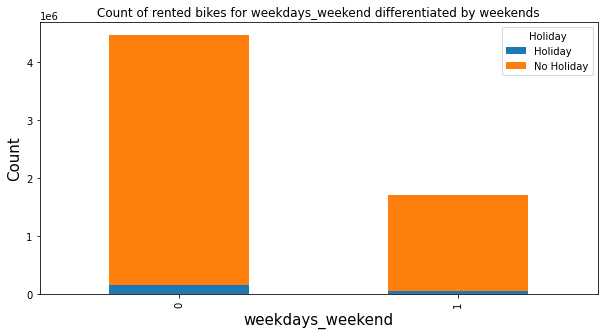

In [27]:
# Visualizing through stacked bar chart
df_count.set_index('weekdays_weekend').plot(kind='bar', stacked=True, figsize=(10,5))
plt.xlabel("weekdays_weekend", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of rented bikes for weekdays_weekend differentiated by weekends")
plt.show()

Rented bikes are mostly used in off weekend. During holidays on weekends people generally do not use much rented bikes.

###4.2 Multivariate analysis

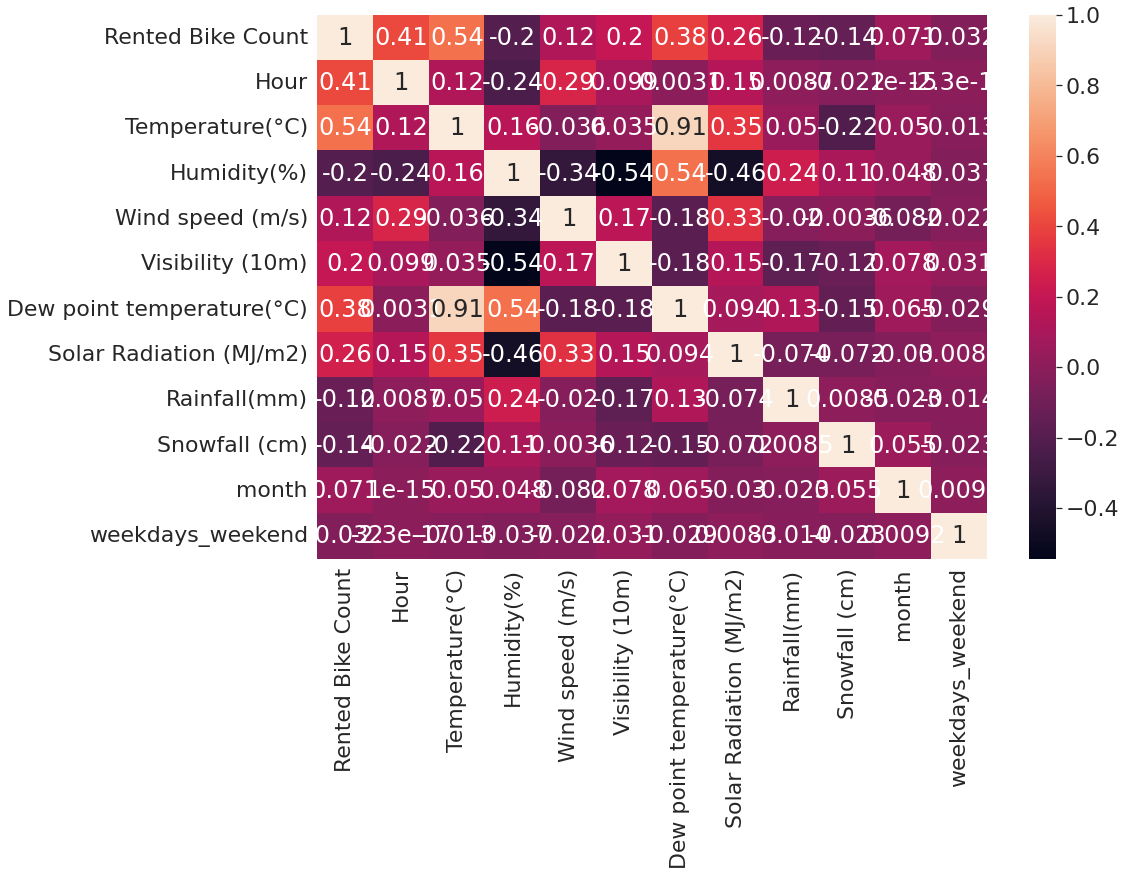

In [19]:
# Checking the correlation among variables

corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

There is high correlation between Dew point temperature and Temperature , i.e., 0.91

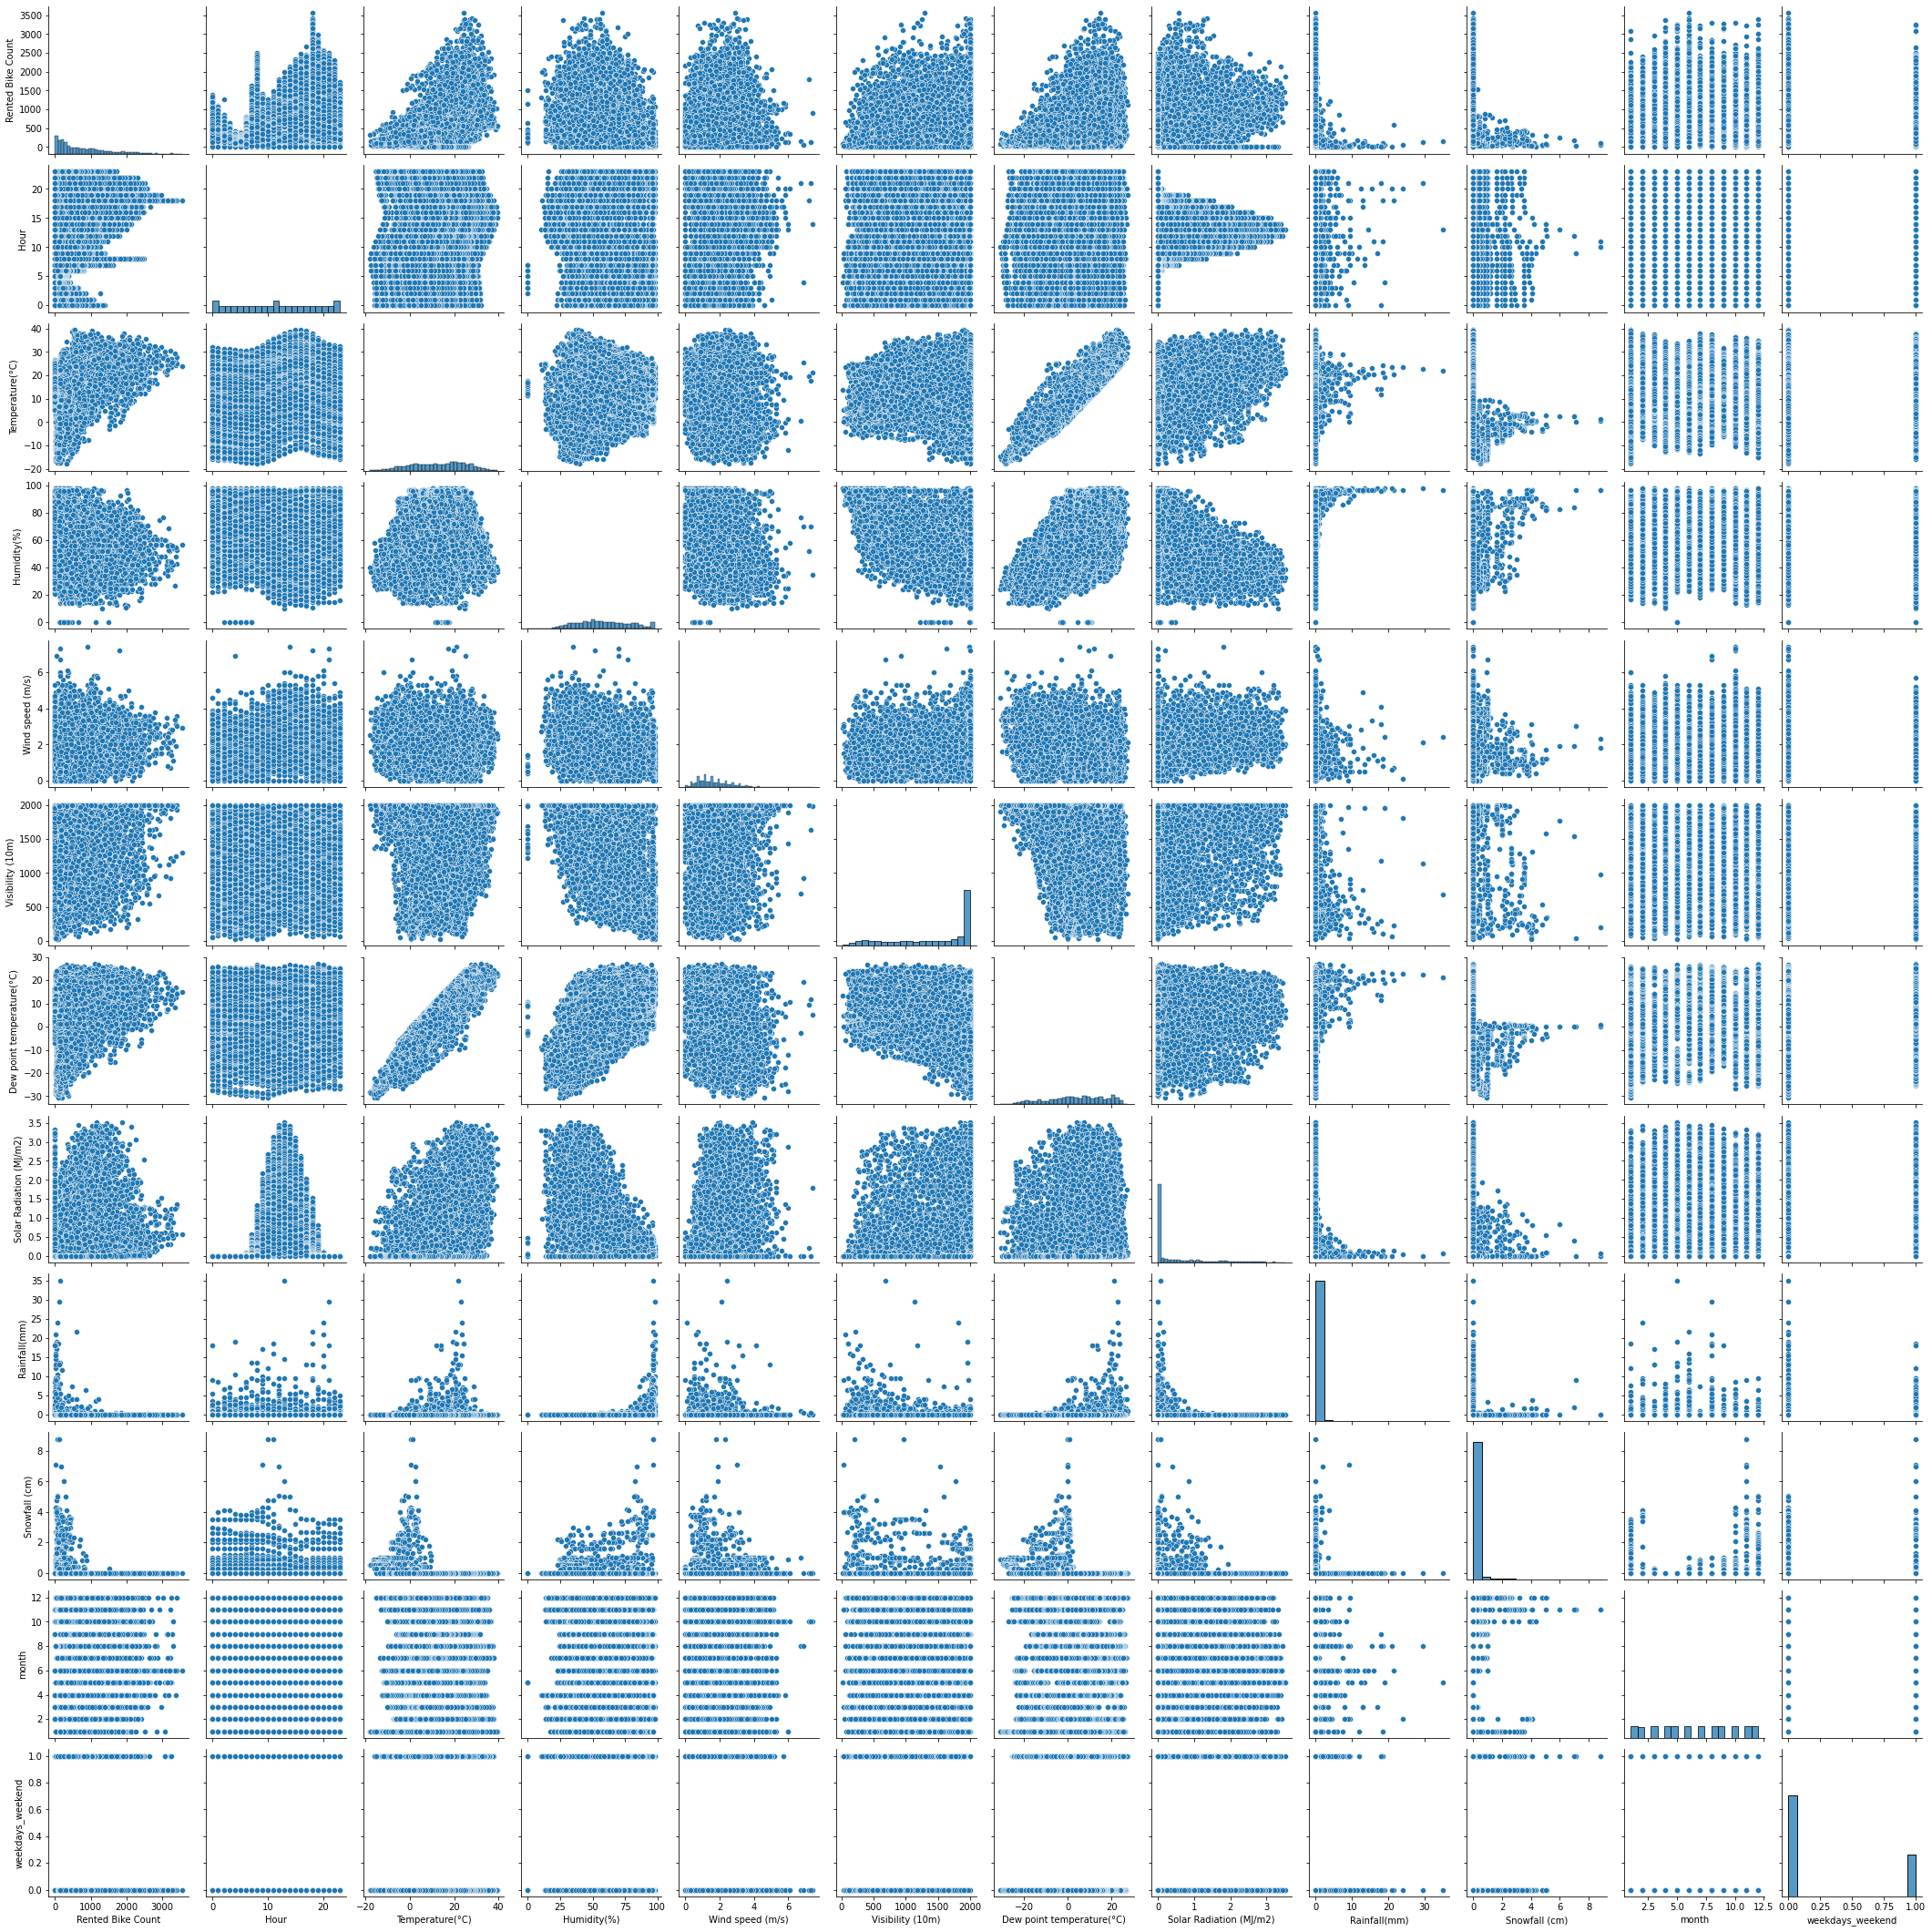

In [ ]:
# Pair Plot visualization 
sns.pairplot(df)

In [34]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
# multicollinearity result

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

variables        VIF
0                        Hour   4.424147
1             Temperature(°C)  34.331857
2                 Humidity(%)   6.973710
3            Wind speed (m/s)   4.835871
4            Visibility (10m)   9.309721
5   Dew point temperature(°C)  17.758961
6     Solar Radiation (MJ/m2)   2.881777
7                Rainfall(mm)   1.082987
8               Snowfall (cm)   1.125842
9                       month   4.690212
10           weekdays_weekend   1.416551